In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import learning_curve

#Configura o estilo do gráfico

In [72]:
sns.set_style("whitegrid")

#Carrega o dataset

In [73]:
df = pd.read_csv("Titanic-Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Tratamento dos dados do dataSet. Dropei as colunas com o nome, o ticket, a cabine(Porque tem apenas 204 linhas não nulas), e o Id dos passageiros, para melhor otimização, e porque não são tão relevantes, além disso preechi os valores faltantes na coluna de idade com a mediana dessa coluna, e dropei
a coluna do local onde foram embarcados

In [74]:
df = df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1)
df["Age"] = df["Age"].fillna(df["Age"].median())
df = df.dropna(subset = "Embarked")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


#Define a coluna que eu quero classificar/prever

In [75]:
Coluna = "Survived"


#Pega todas as colunas, menos a coluna que eu escolhi

In [76]:
X = df.drop(Coluna, axis=1)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB
None


#Pega a coluna que eu escolhi

In [77]:
Y = df[Coluna]
print(Y.info())

<class 'pandas.core.series.Series'>
Index: 889 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB
None


#Transforma o texto em binário

In [78]:
X = pd.get_dummies(X, drop_first=True)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Fare        889 non-null    float64
 5   Sex_male    889 non-null    bool   
 6   Embarked_Q  889 non-null    bool   
 7   Embarked_S  889 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 44.3 KB
None


#Cria as variáveis que eu vou utilizar para treinar e testar, defini o padrão para 80% dos dados para treinto, e 20% para teste

In [79]:
X_treino, X_test, Y_treino, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#Vou escalonar os dados para ficar na faixa entre 0 e 1, para não ter desregulação de pesos

In [80]:
scalonamento = StandardScaler()

#treinar o X, com o escalonamento, utilizando fit_transform para aprender a média e o desvio dos dados

In [81]:
X_treino = scalonamento.fit_transform(X_treino)
print(X_treino)

[[ 0.81095497 -0.11407718 -0.4663365  ...  0.72508694 -0.31720529
   0.61908681]
 [ 0.81095497 -0.79763014 -0.4663365  ...  0.72508694 -0.31720529
   0.61908681]
 [ 0.81095497 -0.11407718 -0.4663365  ...  0.72508694  3.15253256
  -1.61528235]
 ...
 [ 0.81095497 -0.26597784  0.44206145 ...  0.72508694 -0.31720529
  -1.61528235]
 [-0.39529813  1.10112808  0.44206145 ...  0.72508694 -0.31720529
   0.61908681]
 [ 0.81095497 -0.64572948 -0.4663365  ...  0.72508694 -0.31720529
   0.61908681]]


#Transformar o teste, usando a média e desvio que aprendeu no fit_transform, utilizamos apenas o transform e não o fit_transform
#pois queremos utilizar a mesma regua de média calcula com os dados de treino

In [82]:
X_test = scalonamento.transform(X_test)
print(X_test)

[[-0.39529813  0.49352545 -0.4663365  ... -1.37914496 -0.31720529
   0.61908681]
 [-0.39529813  1.55683005 -0.4663365  ... -1.37914496 -0.31720529
   0.61908681]
 [ 0.81095497  1.40492939 -0.4663365  ...  0.72508694 -0.31720529
   0.61908681]
 ...
 [-1.60155123 -0.56977915 -0.4663365  ...  0.72508694 -0.31720529
  -1.61528235]
 [ 0.81095497 -0.56977915 -0.4663365  ...  0.72508694 -0.31720529
   0.61908681]
 [-0.39529813 -0.41787849 -0.4663365  ...  0.72508694 -0.31720529
   0.61908681]]


#criando o modelo

In [83]:
modelo = LogisticRegression()

#Treinando o modelo utilizando os dados de teste de X, para prever o Y

In [84]:
modelo.fit(X_treino,Y_treino)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

#Guardando em uma variável a precisão do modelo

In [85]:
precisao = modelo.score(X_test,Y_test)

#Imprimindo a precisao

In [86]:
print(F"Precisao igual a: {precisao * 100:.2f}%")

Precisao igual a: 83.71%


#Cria uma figura com a matriz de confusão. O gráfico mostra o quanto o meu modelo acertou, e o quanto ele confundiu, sendo 90 mortos corretamente classificados e 15 pessoas que sobreviveram mas foram classificadas como mortas. e 14 que morreram e foram classificadas como vivas.

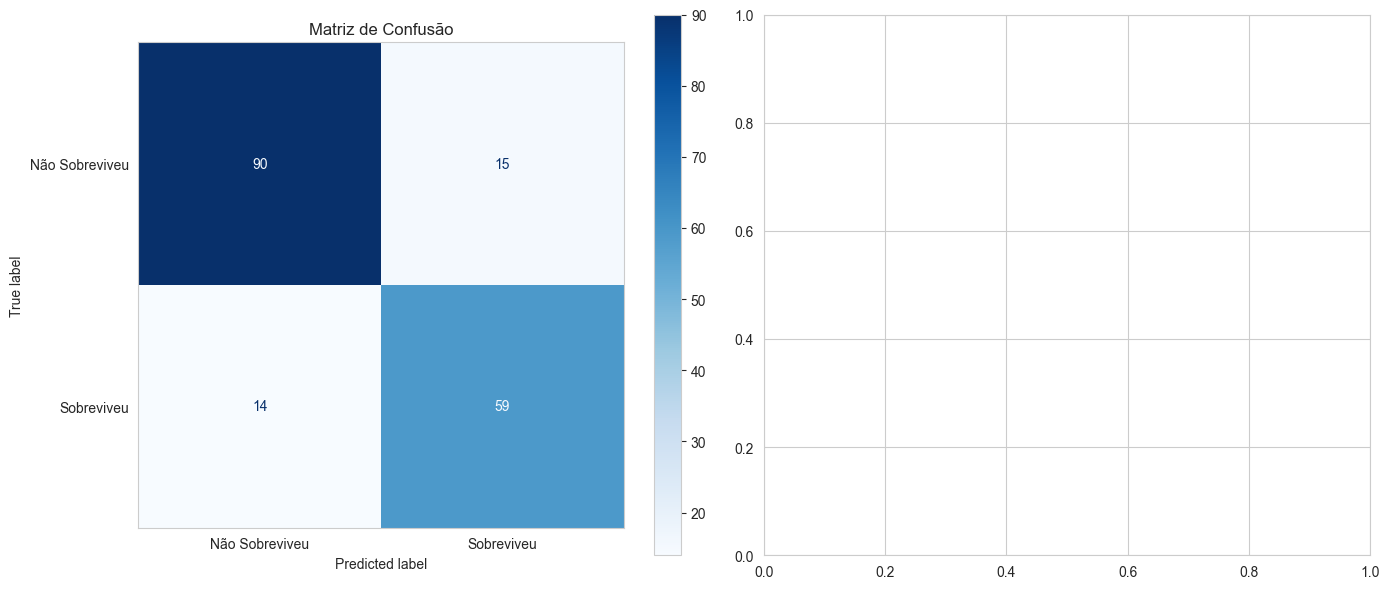

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('white')

ConfusionMatrixDisplay.from_estimator(
    modelo, 
    X_test, 
    Y_test, 
    display_labels=['Não Sobreviveu', 'Sobreviveu'],
    cmap='Blues', 
    ax=ax1
)
ax1.set_title("Matriz de Confusão")
ax1.grid(False)


plt.tight_layout()
plt.show()